In [ ]:
%pip install --no-cache-dir --upgrade python2verilog[full]

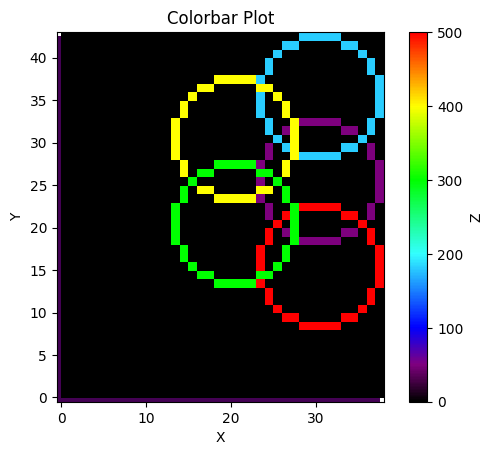

In [1]:
from python2verilog import verilogify, namespace_to_verilog, get_namespace
from python2verilog.utils.visualization import make_visual

ns = get_namespace("./notebook")


@verilogify(ns)
def circle_lines(centre_x: int, centre_y: int, radius: int):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1


@verilogify(ns)
def olympic_logo_mids(mid_x: int, mid_y: int, spread: int):
    """
    Yields the middle coordinates and the color
    for the 5 circles in the olympics logo
    """
    yield mid_x, mid_y + spread, 50
    yield mid_x + spread * 2, mid_y + spread, 180
    yield mid_x - spread * 2, mid_y + spread, 500
    yield mid_x + spread, mid_y - spread, 400
    yield mid_x - spread, mid_y - spread, 300


@verilogify(ns)
def olympic_logo(mid_x, mid_y, radius):
    """
    Draws the olympic logo
    """
    spread = radius - 2
    middles_and_colors = olympic_logo_mids(mid_x, mid_y, spread)
    for x, y, color in middles_and_colors:
        coords = circle_lines(x, y, radius)
        for x, y in coords:
            yield x, y, color


result = list(olympic_logo(25, 25, 7))
make_visual(result)

module, testbench = namespace_to_verilog(ns)

In [2]:
print(module)

module circle_lines (
    // Function parameters (only need to be set when start is high):
    input wire signed [31:0] centre_x,
    input wire signed [31:0] centre_y,
    input wire signed [31:0] radius,

    input wire _clock, // clock for sync
    input wire _reset, // set high to reset, i.e. done will be high
    input wire _start, // set high to capture inputs (in same cycle) and start generating

    // Implements a ready/valid handshake based on
    // http://www.cjdrake.com/readyvalid-protocol-primer.html
    input wire _ready, // set high when caller is ready for output
    output reg _valid, // is high if output values are valid

    output reg _done, // is high if module done outputting

    // Output values as a tuple with respective index(es)
    output reg signed [31:0] _out0,
    output reg signed [31:0] _out1
);
    // State variables
    localparam _state_0_while_1_40_optimal = 0;
    localparam _state_0_while_2 = 1;
    localparam _state_0_while_3 = 2;
    localparam

In [3]:
print(testbench)

/*

# Python Function
@verilogify(ns)
def circle_lines(centre_x: int, centre_y: int, radius: int):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1


# Test Cases
print(list(cir